# **Unit 1 Project**
#### **Group 1**: Bhavesh Mekala, Alex Taylor, Anika Banerjee, Shanzeh Amirali, Nancy Kye, Mia Bechara

**2.) Python code and resulting visualization of (1) a LIF (Leaky Integrate and Fire) neuron, (2) a LIF model updated to include voltage-gated sodium channel neuron, and (3) a simple neural network of your choice**

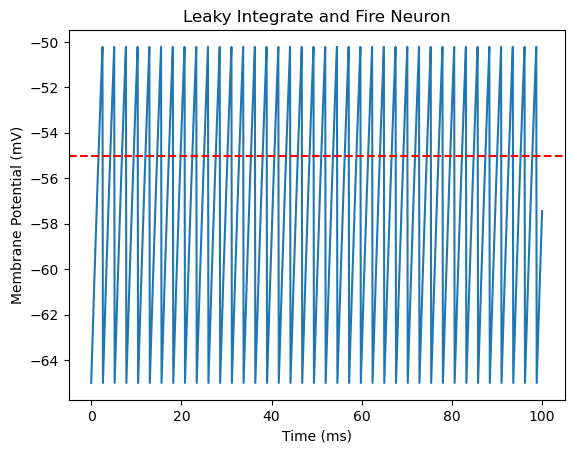

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Simulation parameters
dt = 0.1  # time step (ms)
T = 100  # total time to simulate (ms)
time = np.arange(0, T+dt, dt)
V_reset = -65  # reset potential (mV)
V_threshold = -50  # threshold potential (mV)
Rm = 1  # membrane resistance (MΩ)
tau_m = 10  # membrane time constant (ms)
I = 1.5  # input current (nA)


# Initialize membrane potential
V = np.zeros_like(time)
V[0] = V_reset


# Simulate LIF neuron
for i in range(1, len(time)):
    dV = (-V[i-1] + Rm*I) * dt / tau_m
    V[i] = V[i-1] + dV
    if V[i] >= V_threshold:
        V[i] = V_reset


# Plot
plt.plot(time, V)
plt.title('Leaky Integrate and Fire Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=-55, color='red', linestyle='--', label='Threshold (mV)')
plt.show()


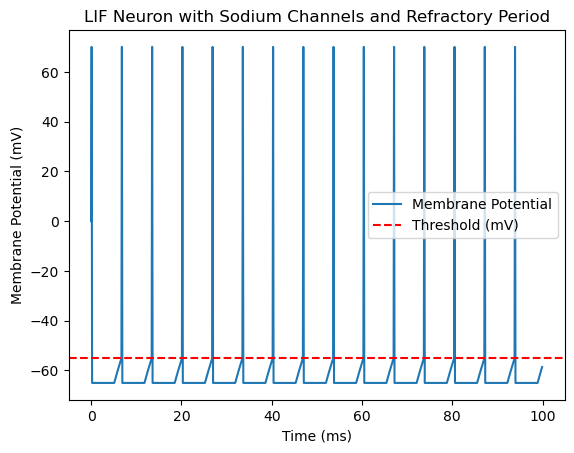

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def lif_neuron_with_sodium(I, time, tau=10, V_threshold=-55, V_reset=-65, V_peak=70,
                           R=1, dt=0.1, g_Na=0.1, E_Na=50, g_L=0.05, refractory_period=5):
    # ... rest of the code (using g_L within the function)


    """
    Simulates a Leaky Integrate-and-Fire neuron with voltage-gated sodium channels and refractory period.


    Parameters:
    - I: Input current (function of time).
    - time: Total time for the simulation.
    - tau: Membrane time constant.
    - V_threshold: Threshold voltage for firing.
    - V_reset: Reset voltage after firing.
    - V_peak: Peak voltage reached during action potential.
    - R: Membrane resistance.
    - dt: Time step for the simulation.
    - g_Na: Sodium conductance.
    - E_Na: Sodium equilibrium potential.
    - refractory_period: Duration of the refractory period after a spike.


    Returns:
    - V: Membrane potential over time.
    - spikes: Spike times.
    """


    V = np.zeros(int(time/dt))
    spikes = []
    in_refractory = 0


    for t in range(1, len(V)):
        if in_refractory > 0:
            # In refractory period, reset and skip integration
            V[t] = V_reset
            in_refractory -= 1
        else:
            # Simulate leaky integration with leak term and variable input current
            V[t] = V[t-1] + dt/tau * (-V[t-1] + I(t)*R - (V[t-1] - V_reset) * g_L)


            # Check for spike
            if V[t] >= V_threshold:
                spikes.append(t*dt)
                V[t] = V_peak
                in_refractory = int(refractory_period / dt)


    return V, spikes


# Example usage (define a function for input current)
def input_current(t):
    return 1.5 + 0.5 * np.sin(0.02 * t)  # Example sinusoidal input


time = 100
V, spikes = lif_neuron_with_sodium(input_current, time)
t = np.arange(0, time, 0.1)


# Plot the membrane potential and the threshold line
plt.plot(t, V, label='Membrane Potential')
plt.axhline(y=-55, color='red', linestyle='--', label='Threshold (mV)')


# Customize the plot (optional)
plt.title('LIF Neuron with Sodium Channels and Refractory Period')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()


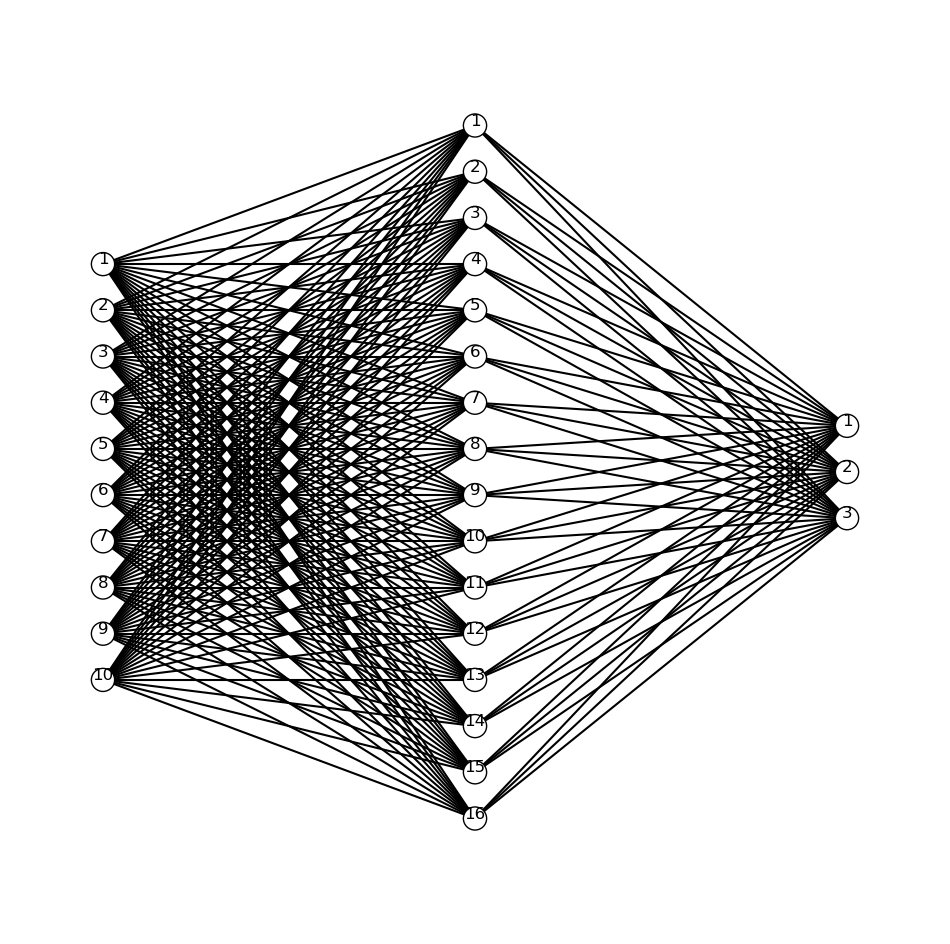

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :param ax: matplotlib.axes.Axes instance
    :param left: float, Left coordinate
    :param right: float, Right coordinate
    :param bottom: float, Bottom coordinate
    :param top: float, Top coordinate
    :param layer_sizes: list of int, List containing the number of neurons for each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Annotation on the neurons
            text = ax.text(n*h_spacing + left, layer_top - m*v_spacing, str(m+1), size=12, ha='center', zorder=5)
    
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)


fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [10, 16, 3])
plt.show()

**3.) A description/comparison/evaluation of each of these models.**

1. Leaky Integrate and Fire (LIF) Model 
    * Function 
        * To model the basic function of a neuron using a parallel equivalent circuit
        * Takes an input current, integrates it, and outputs a voltage
    * Benefits
        * Very simple and can be used to model a variety of different neurons
        * Quantitative descriptions of input and output makes it easier to understand 
        * Advances our current models of neurons, to better understand how the brain works
    * Limitations
        * Not very accurate, due to the simplicity 
        * Needs to have a preset voltage threshold, in order to generate spikes
    * Differences
        * Most simple model of the three
        * It is different from a biological neuron because it does not have a spike generator (equivalent to the voltage-gated sodium channels)
    * Connection to Information Theory
        * Most concise
        * Fewest number of bits
            * This is the fewest number of bits because it is the most simplistic model of a neuron. It doesn’t need a lot of bits as it is focusing on the most important parts, rather than adding biologically accurate parts (like ion channels) for accuracy and therefore complexity
            
2. LIF with a Voltage Gated Sodium Channel
    * Function 
        * Model a basic neuron with more accuracy than the standard LIF model
    * Benefits
        * More accurate to a real neuron
        * More accurate spike generation
        * Can use different types of codes (i.e. temporal, rate, latency) to compare different activities   
    * Limitations
        * Can be difficult to set the parameters for voltage threshold 
        * Can’t account for all of the other complexity variables (i.e. synaptic plasticity) 
    * Differences
        * Inclusion of Voltage Gated Sodium Channel 
    * Connection to Information Theory
        * Less concise than the LIF model 
        * More complex than the LIF and contains more bits
            * There are more bits because the addition of the sodium channels makes it more complex and therefore in need of more information, as it is more biologically accurate. 
            * Similar to how removing NMDA receptors from the model in the Beniaguev et al. paper added complexity, the addition of these channels does the same thing.

3. Feedforward Model
    * Function
        * Model of a neuron to to control or correct different behaviors 
        * Made up of two components 
            * Actuator: device that is doing the task of the model in response to the controller’s instructions 
            * Controller: component that provides instructions for the actuator to follow once it senses an input      
    * Benefits
        * Accurate and rapid response 
        * Simple 
        * Easy to train (due to simplicity) 
    * Limitations
        * Response accuracy and speed depends on functionality of the controller
        * Works less well for non-consistent situations
            * This is why predictive feedforward loops exist!  
    * Differences
        * Type of macrocircuit (looking at how neurons interact with each other to create behaviors as opposed to how individuals act) 
        * Type of neuron and related channels aren’t specified
    * Connection to Information Theory
        * Most complex and therefore highest number of bits 
        * Hardest to decode/encode
            * Unlike the other types of models, there are more “moving pieces” that need to have their own specific information encoded in order to function. 
            * They also need to be able to understand the information from one another at a very rapid rate in order to be effective. 

**4.) With a model of your choice (updated LIF or simple neural network) show with visualizations what happens if the inputs given differ (such as if there are not enough inputs to sum to reach threshold) or if the inputs are coming in bursts etc. Be sure to either show two different graphs OR two different indicated lines on the same graph. Describe what change you made to the inputs and why it resulted in the change you see on the graph/visualization**

We are changing the input using the equation x * np.sin(0.02 * t) in which we are multiplying a sinusoidal waveform by a scaling factor that determines the amplitude of the input current. In order to obtain different firing patterns, we can change the input current magnitude. Our visualizations demonstrate a tonic and a burst pattern, different intrinsic fiiring patterns that can be demonstrated by biological neurons. The burst pattern demonstrates periods of time where there is insufficient summation to reach the threshold and is unable to fire an action potential. 

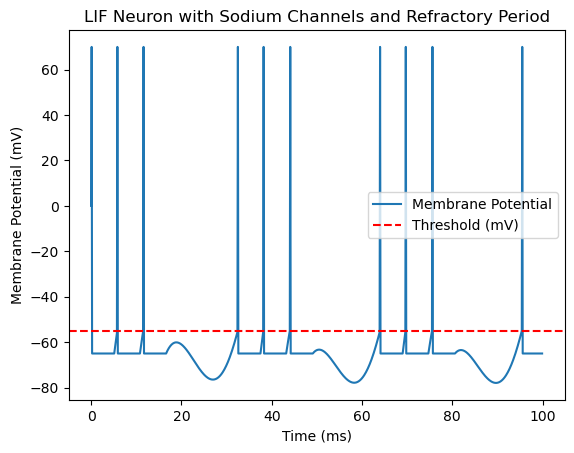

In [45]:
import matplotlib.pyplot as plt
import numpy as np


def lif_neuron_with_sodium(I, time, tau=10, V_threshold=-55, V_reset=-65, V_peak=70,
                           R=1, dt=0.1, g_Na=0.1, E_Na=50, g_L=0.05, refractory_period=5):
    # ... rest of the code (using g_L within the function)


    """
    Simulates a Leaky Integrate-and-Fire neuron with voltage-gated sodium channels and refractory period.


    Parameters:
    - I: Input current (function of time).
    - time: Total time for the simulation.
    - tau: Membrane time constant.
    - V_threshold: Threshold voltage for firing.
    - V_reset: Reset voltage after firing.
    - V_peak: Peak voltage reached during action potential.
    - R: Membrane resistance.
    - dt: Time step for the simulation.
    - g_Na: Sodium conductance.
    - E_Na: Sodium equilibrium potential.
    - refractory_period: Duration of the refractory period after a spike.


    Returns:
    - V: Membrane potential over time.
    - spikes: Spike times.
    """


    V = np.zeros(int(time/dt))
    spikes = []
    in_refractory = 0


    for t in range(1, len(V)):
        if in_refractory > 0:
            # In refractory period, reset and skip integration
            V[t] = V_reset
            in_refractory -= 1
        else:
            # Simulate leaky integration with leak term and variable input current
            V[t] = V[t-1] + dt/tau * (-V[t-1] + I(t)*R - (V[t-1] - V_reset) * g_L)


            # Check for spike
            if V[t] >= V_threshold:
                spikes.append(t*dt)
                V[t] = V_peak
                in_refractory = int(refractory_period / dt)


    return V, spikes


# Example usage (define a function for input current)
def input_current(t):
    return 100 * np.sin(0.02 * t)  # Example sinusoidal input


time = 100
V, spikes = lif_neuron_with_sodium(input_current, time)
t = np.arange(0, time, 0.1)


# Plot the membrane potential and the threshold line
plt.plot(t, V, label='Membrane Potential')
plt.axhline(y=-55, color='red', linestyle='--', label='Threshold (mV)')


# Customize the plot (optional)
plt.title('LIF Neuron with Sodium Channels and Refractory Period')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

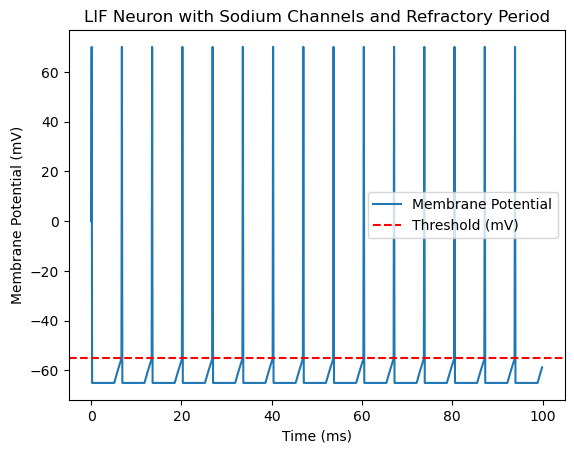

In [44]:
 import matplotlib.pyplot as plt
import numpy as np


def lif_neuron_with_sodium(I, time, tau=10, V_threshold=-55, V_reset=-65, V_peak=70,
                           R=1, dt=0.1, g_Na=0.1, E_Na=50, g_L=0.05, refractory_period=5):
    # ... rest of the code (using g_L within the function)


    """
    Simulates a Leaky Integrate-and-Fire neuron with voltage-gated sodium channels and refractory period.


    Parameters:
    - I: Input current (function of time).
    - time: Total time for the simulation.
    - tau: Membrane time constant.
    - V_threshold: Threshold voltage for firing.
    - V_reset: Reset voltage after firing.
    - V_peak: Peak voltage reached during action potential.
    - R: Membrane resistance.
    - dt: Time step for the simulation.
    - g_Na: Sodium conductance.
    - E_Na: Sodium equilibrium potential.
    - refractory_period: Duration of the refractory period after a spike.


    Returns:
    - V: Membrane potential over time.
    - spikes: Spike times.
    """


    V = np.zeros(int(time/dt))
    spikes = []
    in_refractory = 0


    for t in range(1, len(V)):
        if in_refractory > 0:
            # In refractory period, reset and skip integration
            V[t] = V_reset
            in_refractory -= 1
        else:
            # Simulate leaky integration with leak term and variable input current
            V[t] = V[t-1] + dt/tau * (-V[t-1] + I(t)*R - (V[t-1] - V_reset) * g_L)


            # Check for spike
            if V[t] >= V_threshold:
                spikes.append(t*dt)
                V[t] = V_peak
                in_refractory = int(refractory_period / dt)


    return V, spikes


# Example usage (define a function for input current)
def input_current(t):
    return 1 * np.sin(0.02 * t)  # Example sinusoidal input

time = 100
V, spikes = lif_neuron_with_sodium(input_current, time)
t = np.arange(0, time, 0.1)


# Plot the membrane potential and the threshold line
plt.plot(t, V, label='Membrane Potential')
plt.axhline(y=-55, color='red', linestyle='--', label='Threshold (mV)')


# Customize the plot (optional)
plt.title('LIF Neuron with Sodium Channels and Refractory Period')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

**5.) With a model of your choice (updated LIF or simple neural network) show with visualizations what happens if inhibitory inputs are added on to the model. Describe what change you made to the inputs and why it resulted in the change you see on the graph/visualization.**

The original LIF model was set to a constant value that reaches the threshold potential of -55 mV; however, the constant value was changed to -65 mV for the inhibitory input graph to show that it does not reach threshold potential . Additionally, we changed the number of action potentials fired in the inhibitory input graph by changing the number of refractory periods to a lower number (in_refractory = int(17/dt) from int(refractory_period / dt)). The membrane potential with inhibition displays an overall lower voltage compared to the original input without inhibition. The resulting difference is due to the counteraction of the excitatory inputs by the inhibitory ones, thus making it more difficult for the membrane potential to reach threshold and fire action potentials, as can be seen with the inhibition graph only reaching -65 mV and not the threshold potential of -55 mV.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


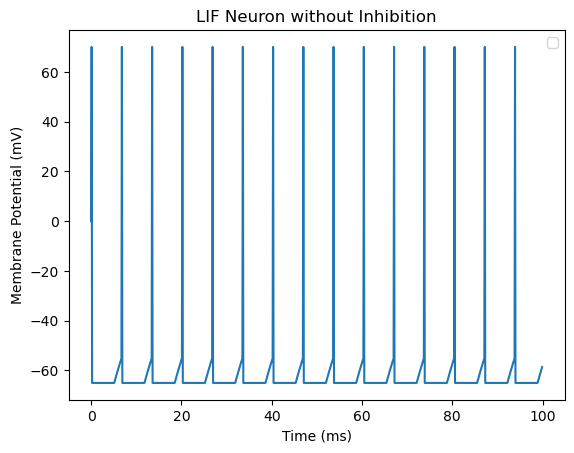

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


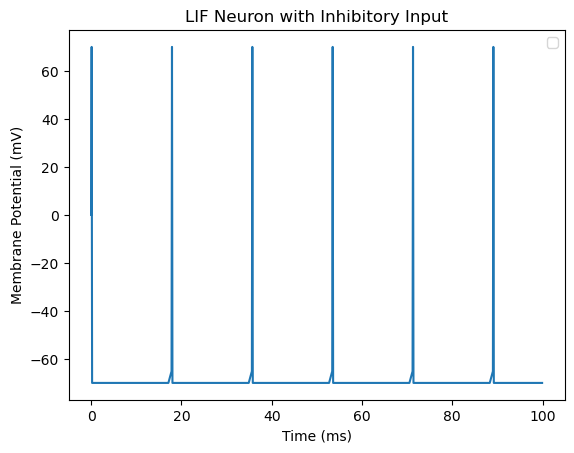

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#for normal input
def lif_neuron_with_sodium(I, time, tau=10, V_threshold=-55, V_reset=-65, V_peak=70,
                           R=1, dt=0.1, g_Na=0.1, E_Na=50, refractory_period=5):
    """
    Simulates a Leaky Integrate-and-Fire neuron with voltage-gated sodium channels and refractory period.


    Parameters:
    - I: Input current.
    - time: Total time for the simulation.
    - tau: Membrane time constant.
    - V_threshold: Threshold voltage for firing.
    - V_reset: Reset voltage after firing.
    - V_peak: Peak voltage reached during action potential.
    - R: Membrane resistance.
    - dt: Time step for the simulation.
    - g_Na: Sodium conductance.
    - E_Na: Sodium equilibrium potential.
    - refractory_period: Duration of the refractory period after a spike.


    Returns:
    - V: Membrane potential over time.
    - spikes: Spike times.
    """
    V = np.zeros(int(time/dt))
    spikes = []
    in_refractory = 0


    for t in range(1, len(V)):
        if in_refractory > 0:
            # In refractory period, reset and skip integration
            V[t] = V_reset
            in_refractory -= 1
        else:
            # Simulate the leaky integration
            V[t] = V[t-1] + dt/tau * (-V[t-1] + I*R)


            # Check for spike
            if V[t] >= V_threshold:
                spikes.append(t*dt)
                V[t] = V_peak  # Set to peak value
                in_refractory = int(refractory_period / dt)  # Enter refractory period


    return V, spikes


# Example usage
time = 100
I = 1.5  # Input current
V, spikes = lif_neuron_with_sodium(I, time)
t = np.arange(0, time, 0.1)


plt.plot(t, V)
plt.title('LIF Neuron without Inhibition')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
#plt.scatter(spikes, int(V_peak)*len(spikes), color='red', marker='o', label='Spikes')#
plt.legend()
plt.show()
#for inhibitory input
def lif_neuron_with_sodium(I, time, tau=10, V_threshold=-55, V_reset=-70, V_peak=70,
                           R=1, dt=0.1, g_Na=0.1, E_Na=50, refractory_period=5):
    V = np.zeros(int(time/dt))
    spikes = []
    in_refractory = 0


    for t in range(1, len(V)):
        if in_refractory > 0:
            # In refractory period, reset and skip integration
            V[t] = V_reset
            in_refractory -= 1
        else:
            # Simulate the leaky integration
            V[t] = V[t-1] + dt/tau * (-V[t-1] + I*R)


            # Check for spike
            if V[t] >= -65:
                spikes.append(1)
                V[t] = V_peak  # Set to peak value
                in_refractory = int(17/ dt)  # Enter refractory period


    return V, spikes


# Example usage
time = 100
I = 1.5  # Input current
V, spikes = lif_neuron_with_sodium(I, time)
t = np.arange(0, time, 0.1)


plt.plot(t, V)
plt.title('LIF Neuron with Inhibitory Input')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
#plt.scatter(spikes, int(V_peak)*len(spikes), color='red', marker='o', label='Spikes')#
plt.legend()
plt.show()


**6.) Select one topic of your choice from the list below to describe/demonstrate/extend your knowledge/learning**

***Artifical Intelligence***

You've heard of ChatGPT and OpenAI and seen that everyone seems to want to put AI on the end of their name. But what even is AI? Artificial Intelligence (AI) is basically any function/system that can do what a human could do. In general, AI can be split into 2 types: strong and weak

strong AI | weak AI
----------|--------
a machine that shows human cognitive abilities (don't worry doesn't exist yet) | the ideas a computer system can model a sort of intelligent behavior to problem solve
machines have their own mind and can do any of the the tasks on their own | do NOT have a mind of their own, but can do a lot of different problems only with the help of pre-define ranges of function
ex: Ultron from the Avengers (real one doesn't exist yet) | ex: Alexa & Siri

Before getting into the limitations/benefits and logistical application, let's break down the different aspects of AI. Attached below is the a heirarchiacal organization of different AI tools:
![organiztion of AI, ML, ANN, and DNN](https://www.bbntimes.com/images/AI_Complete_Graph.jpeg)

1. Machine Learning (ML)
    * ML is one of the most basic forms of AI
    * Computers are able "learn" and adapt to a task without having to be programmed for every single step
    * HOWEVER, humans have to tell it what to do by defining the feature extraction method
    * 5 steps to program a machine learning model:
        1. Get Data: to begin the process of programming ML,you need to actually get data (whether is be cat pictures or something else) and sort it into "training" and "testing" data to be used by the model
        2. Clean, Prepare, and Manage Data: After collecting data, you need to sift through the data to remove any outliers, non-applicable responses, zeros, etc.  
        3. Train Model: Using the training data collected, you must "teach" the model to be able to recognize certain features and aspects of what they want it to do. This is where the models of machine learning come into play. In terms of Goldilocks, you can think of the 3 models as Under-fit (too cold), Over-fit (too hot), Good fit (just right)  
        
        ![different ML models](https://www.cmswire.com/-/media/341dd93da5984f539a05603ca9ef4291.ashx?h=351&w=681)

            Abdoullaev, A. (2021). *Artificial Intelligence*. Online Image.

        4. Test Model: After creating a model with the training data, you now use the testing data to see if the model is still able to recognize the features/tasks it was trained to do. If the model is a good fit, that means it can accomodate to both the training and the testing data
            * if using non-linear data, might need to use a Kernel (mathematical/statistical trick) that can separate the data
        5. Improve/re-train: If the model does not fit the testing data, one must retrain the machine to make it align with both the training and the testing data so that it can recognize other, unseen data that is inputted in.

to sum it up, you can use this picture for reference:

![5 steps of ML](https://miro.medium.com/v2/1*KzmIUYPmxgEHhXX7SlbP4w.jpeg)

2. Neural Network (ANN)
    * Inspiration of the human brain and the function of the biological neural networks (BNN) paved the way to model computers using interconnected "nodes" in place of neurons
    * Unlike ML, humans do not need to pre-define features for the ANN to use, it simply does so by itself
    * to compare ML vs. ANN, refer to the picture:
    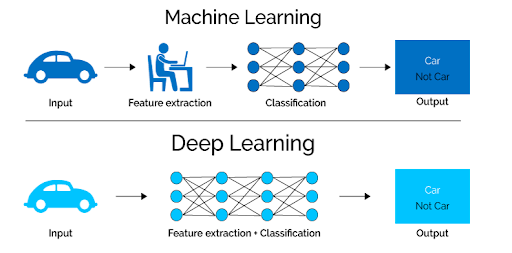

3. Deep Learning (DNN)
    * DNN is a branch off of ANN because while it uses the same idea of biological neural networks, it has hidden layers and nodes that ANN do not have
    * A hidden layer is called that because (unless you're a very good computer scientisist) the workings of it are hidden to the eye/mind and very hard to interpret
        * also is neither an input or output layer
    * Though they are very similar, look at the graphic below to help differentiate between an ANN and DNN:
    ![ann vs dnn](https://www.researchgate.net/publication/337243824/figure/fig2/AS:825059786629120@1573720990022/Typical-architectures-of-artificial-neural-networks-ANN-and-deep-neural-networks-DNN.ppm)
    
The different breadths of AI can give us grasp of what we are dealing with and what we are getting into. While AI is a quickly maturing field, with discoveries/improvements made everyday, it can also have limitations.

aspect|benefits of AI|limitations of AI
------|--------------|-----------------
efficiency| increased productivity and efficiency because of 24/7 availability for streamlined and automated processes | has led to a lot of changes in the job market with the potential loss of future job categories
human interaction| there is a natural language processing for communication with customized use experiences based on preference | obviously has issues understanding normal human interactions and it presents ethical concerns (because it doesn't know)
problem solving | it has complex problem-solving abilities that can optimize the answers to questions in various domains | because it's unable to create its own ideas yet, there is a limited understanding of context, lack of creativity, and a vulnerability to adversial attacks

Though AI is still developing and has limitations now, it is presenting promising results to a fast-adapting future. This field of computer science is continuing to flourish and broaden day by day.  And who knows? We might one day become friends with the systems that we created :)

***References***

Abdoullaev, A. (2021, June 07).  *Artificial Intelligence vs Machine Learning vs Artificial Neural Networks vs Deep Learning*. BBN Times. https://www.bbntimes.com/science/artificial-intelligence-vs-machine-learning-vs-artificial-neural-networks-vs-deep-learning


Khillar,  S. (2020, July 14). *Difference Between Strong and Weak AI*. Difference Between.Net. http://www.differencebetween.net/technology/difference-between-strong-and-weak-ai/


Kumar, S.  (2019, November 25). *Advantages and Disadvantages of Artificial Intelligence*. Medium. https://towardsdatascience.com/advantages-and-disadvantages-of-artificial-intelligence-182a5ef6588c

For a fun, quick video about aan overview to AI, check out this video on youtube:
https://youtu.be/ad79nYk2keg?si=HSLOZVAt0aM1EgXh

We always love some good cat content:

* Fun cat facts
    * Supposedly, cats have played a hand in the extinction of 63 species. 
    * The first cat video was created in 1894 (pre-pre- internet)
    * In 2004, there was a cat who earned a Master's Degree, an MBA specifically. His name is Colby Nolan (and he’s doing better than most of us).

For a fun surprise, google “cat” and push the orange button. Or follow this link: https://g.co/kgs/E79gAK4 :)

![cat video](https://media1.giphy.com/media/iPiUxztIL4Sl2/giphy.gif)